In [ ]:
#Murilo Farias
#2025-11-06

In [ ]:
"""
neural network machine-learning models. 

Hyperparameter Tuning: Fine-tune the hyperparameters of your models to optimize their performance. This could involve using techniques like grid search or random search.

Cross-Validation: Implement cross-validation techniques to assess how well your model will generalize to an independent dataset. This helps in detecting and preventing overfitting.

Handling Imbalanced Data: If your dataset is imbalanced, employ techniques such as oversampling, undersampling, or using specialized algorithms to address this issue.

Feature Importance Analysis: Conduct a thorough analysis of feature importance to identify and focus on the most influential features in your dataset.

"""

In [ ]:
"""
My dataset has:

VisitDuration, time (in seconds) a customer spends on the website,
PagesVisited, number of pages visited during the session,
ItemsViewed, number of items viewed during the session,
DeviceType, 0 for desktop, 1 for mobile,
AdClicks, number of ads clicked during the session,
CartAdds, number of items added to cart during the session,
Age, customer age,
Gender, 0 for women, 1 for men,
Loc_Burnaby, 0/1 location flag,
Loc_Downtown, 0/1 location flag,
Loc_Kitsilano, 0/1 location flag,
Loc_New Westminster, 0/1 location flag,
Loc_Surrey, 0/1 location flag,
Purchase 0 for no purchase, 1 for purchase.

"""

In [ ]:
#I would like to use the logistic model to predict whether a customer will make a purchase (Purchase) based on the other features in the dataset.

In [ ]:
#First the normal logistic model

In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
# 1) Load data
df = pd.read_csv(r"C:\Users\MuriloFarias\Desktop\GitHub\Python\CLASSE_DEA109\Assignment\vancouver_shopping_dataset.csv")

In [13]:
X = df[["VisitDuration", "PagesVisited", "ItemsViewed", "AdClicks", "CartAdds", "Age", "Gender", "DeviceType"]]
y = df['Purchase']

# 3) Train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4) Add constant for Logit
X_train_const = sm.add_constant(X_train)
X_test_const  = sm.add_constant(X_test)

# 5) Fit model
logit_model = sm.Logit(y_train, X_train_const).fit()
print(logit_model.summary())

# 6) Predict on test
y_prob = logit_model.predict(X_test_const)
y_pred = (y_prob >= 0.5) #If probability ≥ 0.5 → predict class 1

print("Accuracy:", accuracy_score(y_test, y_pred))

         Current function value: 0.035980
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               Purchase   No. Observations:                 1600
Model:                          Logit   Df Residuals:                     1591
Method:                           MLE   Df Model:                            8
Date:                Thu, 06 Nov 2025   Pseudo R-squ.:                  0.7240
Time:                        09:23:35   Log-Likelihood:                -57.568
converged:                      False   LL-Null:                       -208.59
Covariance Type:            nonrobust   LLR p-value:                 1.509e-60
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -6.9908      1.441     -4.851      0.000      -9.815      -4.166
VisitDuration     4.2235      0.951      4.441      0.00

c:\Users\MuriloFarias\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
#My model already has a good Pseude R-square of 0,7240 I will run feature importance analysis
#to identify the most influential features in my dataset.

In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
#running it again to have the model fitted

In [14]:
# Load data
df = pd.read_csv(r"C:\Users\MuriloFarias\Desktop\GitHub\Python\CLASSE_DEA109\Assignment\vancouver_shopping_dataset.csv")
# Prepare features
X = df[["VisitDuration", "PagesVisited", "ItemsViewed", "AdClicks", "CartAdds", "Age", "Gender", "DeviceType"]]
y = df['Purchase']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

baseline_model = sm.Logit(y_train, X_train_const).fit(disp=0)
baseline_pseudo_r2 = baseline_model.prsquared

# Calculate accuracy
y_prob_baseline = baseline_model.predict(X_test_const)
y_pred_baseline = (y_prob_baseline >= 0.5).astype(int)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

print(f"\nPseudo R²: {baseline_pseudo_r2:.4f}")
print(f"Test Accuracy: {baseline_accuracy:.4f}")


Pseudo R²: 0.7240
Test Accuracy: 0.9775


c:\Users\MuriloFarias\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:
# Extract feature statistics
feature_stats = pd.DataFrame({
    'Feature': baseline_model.params.index[1:],
    'Coefficient': baseline_model.params.values[1:],
    'P-value': baseline_model.pvalues.values[1:],
    'Significant': baseline_model.pvalues.values[1:] < 0.05
})

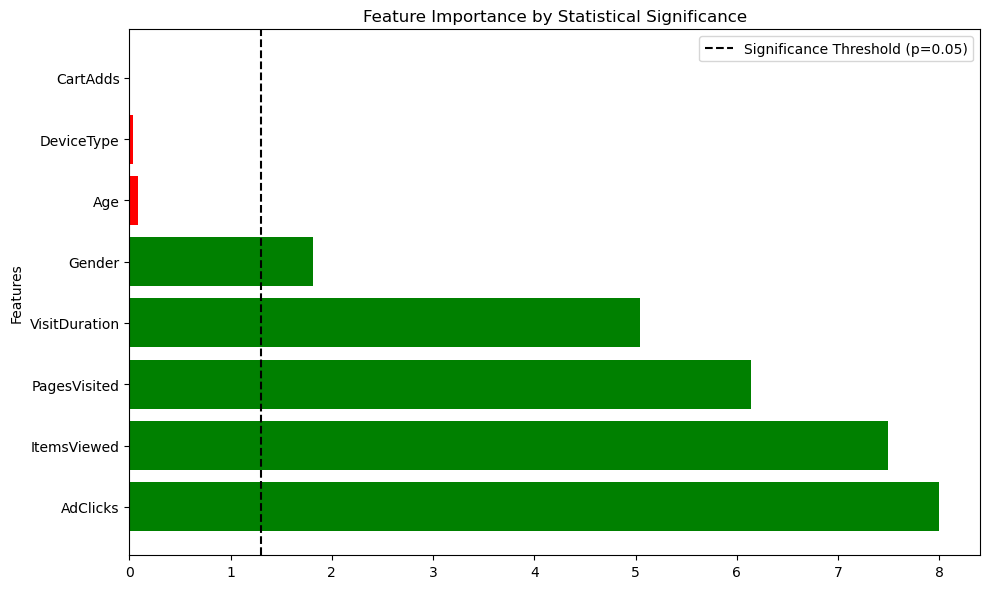

In [22]:
# Sort by p-value
feature_stats = feature_stats.sort_values('P-value')

# Create bar chart
plt.figure(figsize=(10, 6))
colors = ['green' if sig else 'red' for sig in feature_stats['Significant']]
plt.barh(feature_stats['Feature'], -np.log10(feature_stats['P-value']), color=colors)
plt.ylabel('Features')
plt.title('Feature Importance by Statistical Significance')
plt.axvline(x=-np.log10(0.05), color='black', linestyle='--', label='Significance Threshold (p=0.05)')
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
# Identify significant features
significant = feature_stats[feature_stats['Significant']]['Feature'].tolist()
non_significant = feature_stats[~feature_stats['Significant']]['Feature'].tolist()
print(f"\n✅ Significant features (p < 0.05): {significant}")
print(f"❌ Non-significant features: {non_significant}")


✅ Significant features (p < 0.05): ['AdClicks', 'ItemsViewed', 'PagesVisited', 'VisitDuration', 'Gender']
❌ Non-significant features: ['Age', 'DeviceType', 'CartAdds']


In [ ]:
#So now I will remove some features and fit the model again to compare the results.
#first approach  I was running all features, now I will remove non-significant ones.
#first approach: df[["VisitDuration", "PagesVisited", "ItemsViewed", "AdClicks", "CartAdds", "Age", "Gender", "DeviceType"]]

#aftert the feature importance analysis I will remove some and will run using
#second approach: ['AdClicks', 'ItemsViewed', 'PagesVisited', 'VisitDuration', 'Gender']

In [24]:
# Get only significant features
significant = feature_stats[feature_stats['Significant']]['Feature'].tolist()
print(f"\nUsing {len(significant)} significant features: {significant}")


Using 5 significant features: ['AdClicks', 'ItemsViewed', 'PagesVisited', 'VisitDuration', 'Gender']


In [25]:
# Load data
df = pd.read_csv(r"C:\Users\MuriloFarias\Desktop\GitHub\Python\CLASSE_DEA109\Assignment\vancouver_shopping_dataset.csv")

significant = feature_stats[feature_stats['Significant']]['Feature'].tolist()

X = df[significant]
y = df['Purchase']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

refined_model = sm.Logit(y_train, X_train_const).fit(disp=0)

# Evaluate model performance
refined_pseudo_r2 = refined_model.prsquared
y_prob_refined = refined_model.predict(X_test_const)
y_pred_refined = (y_prob_refined >= 0.5).astype(int)
refined_accuracy = accuracy_score(y_test, y_pred_refined)

# Print summary and performance
print(refined_model.summary())
print(f"\nPseudo R² (Refined Model): {refined_pseudo_r2:.4f}")
print(f"Test Accuracy (Refined Model): {refined_accuracy:.4f}")
                                                     


                           Logit Regression Results                           
Dep. Variable:               Purchase   No. Observations:                 1600
Model:                          Logit   Df Residuals:                     1594
Method:                           MLE   Df Model:                            5
Date:                Thu, 06 Nov 2025   Pseudo R-squ.:                  0.3085
Time:                        09:45:54   Log-Likelihood:                -144.25
converged:                       True   LL-Null:                       -208.59
Covariance Type:            nonrobust   LLR p-value:                 4.518e-26
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.3868      0.544     -2.547      0.011      -2.454      -0.320
AdClicks          0.7103      0.128      5.531      0.000       0.459       0.962
ItemsViewed       0.3179      0.053     

In [26]:
#first approach all features:
print("\nFirst Approach (All Features):")
print(f"\nPseudo R²: {baseline_pseudo_r2:.4f}")
print(f"Test Accuracy: {baseline_accuracy:.4f}")


#second approach using significant features only:
print("\nSecond Approach (Significant Features Only):")
print(f"\nPseudo R² (Refined Model): {refined_pseudo_r2:.4f}")
print(f"Test Accuracy (Refined Model): {refined_accuracy:.4f}")


First Approach (All Features):

Pseudo R²: 0.7240
Test Accuracy: 0.9775

Second Approach (Significant Features Only):

Pseudo R² (Refined Model): 0.3085
Test Accuracy (Refined Model): 0.9750


In [ ]:
#In this case removing non-significante features decreased a bit the Pseudo R-square and accuracy.
#But at least I understood which features are more significant to the model.
#In this case Adclicks and Itemsviews are the most significant ones.

In [ ]:
#BAsed on that I also wanna use Hyperparameter Tuning from sklearn.linear_model.LogisticRegression
#Just to check If I can improve the model performance a bit more.

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#but on the first and second approach I was using:
    #statsmodels.Logit()
# logit_model = sm.Logit(y_train, X_train_const).fit()

#So now I will use sklearn's LogisticRegression with Hyperparameter Tuning
    #sklearn.LogisticRegression()



In [28]:
# Load data
df = pd.read_csv(r"C:\Users\MuriloFarias\Desktop\GitHub\Python\CLASSE_DEA109\Assignment\vancouver_shopping_dataset.csv")
X = df[["VisitDuration", "PagesVisited", "ItemsViewed", "AdClicks", "CartAdds", "Age", "Gender", "DeviceType"]]
y = df['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()

In [29]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [200, 500]
}

In [30]:
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [200, 500], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [31]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}


In [32]:
# Evaluate best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy (Best Model): {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy (Best Model): 0.9775

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.40      0.47        10
           1       0.98      0.99      0.99       390

    accuracy                           0.98       400
   macro avg       0.78      0.70      0.73       400
weighted avg       0.97      0.98      0.98       400



In [33]:

print("\nFirst Approach (All Features):")
print(f"Test Accuracy: {baseline_accuracy:.4f}")

print("\nSecond Approach (Significant Features Only):")
print(f"Test Accuracy (Refined Model): {refined_accuracy:.4f}")

print("\nThird approach using Hyperparameter Tuning with LogisticRegression:")
print(f"Test Accuracy (Best Model): {accuracy:.4f}")



First Approach (All Features):
Test Accuracy: 0.9775

Second Approach (Significant Features Only):
Test Accuracy (Refined Model): 0.9750

Third approach using Hyperparameter Tuning with LogisticRegression:
Test Accuracy (Best Model): 0.9775
